In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib
from nltk.metrics import edit_distance
import missingno as msno

#import pandas_profiling as pp

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#show multiple outputs from one cell

pd.set_option('display.max_columns', None)

#pd.set_option('display.max_rows', None)

#display all columns and rows

In [3]:
df=pd.read_csv(r"C:\Users\holly\Desktop\DAExercises\Class9_DataManipulation\titanic.csv")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
df.shape

(891, 15)

In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
684,0,2,male,60.0,1,1,39.0,S,Second,man,True,NaN,Southampton,no,False


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.nunique()

#Return number of unique elements in the object. It counts the number of unique entries over columns or rows.
#It is very useful in categorical features especially in cases where we do not know the number of categories beforehand.

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
df.nlargest(5, "age")
#Returns the first n rows ordered by columns in descending order.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [12]:
df.nlargest(7, "fare")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False


In [13]:
df.nsmallest(5, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [14]:
dupes=df.duplicated()
dupes.sum()

107

In [15]:
df.corr()
#This function is used to find the pairwise correlation of all columns in the dataframe.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [16]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [17]:
df["age"].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

### Bar chart using Matplotlib- Fare based on grouping (Man, Woman, Child)

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

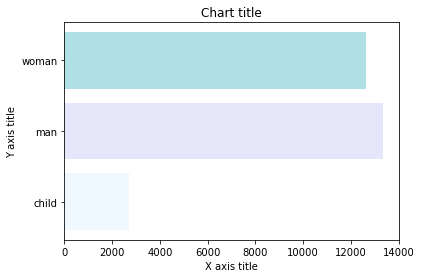

In [19]:
who_fare=df.groupby('who')['fare'].sum().to_frame().reset_index()

#Creating the bar chart 
plt.barh(who_fare['who'],who_fare['fare'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Bar chart using Seaborn

<AxesSubplot:xlabel='fare', ylabel='who'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

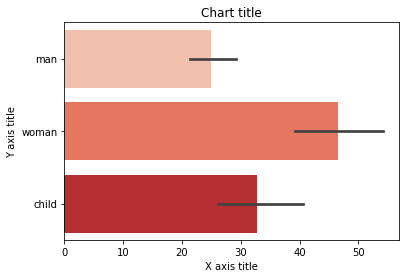

In [21]:

#Creating bar plot
sns.barplot(x = 'fare',y = 'who',data = df,palette = "Reds")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### Column chart

### Column charts are mostly used when we need to compare a single category of data between individual sub-items, for example, when comparing revenue between regions


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

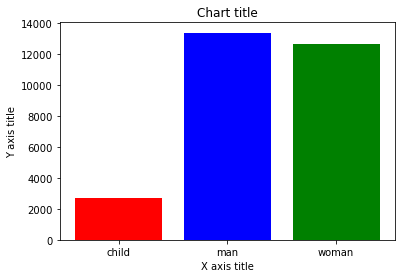

In [28]:
# Column chart using Matplotlib

#Creating the dataset
# df = sns.load_dataset('titanic') 
# df=df.groupby('who')['fare'].sum().to_frame().reset_index()

#done with variable who_fare

#Creating the column plot 
plt.bar(who_fare['who'],who_fare['fare'],color = ['red','blue','green']) 

#['#F0F8FF','#E6E6FA','#B0E0E6'] shades of blue

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Column chart using Seaborn

<AxesSubplot:xlabel='who', ylabel='fare'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

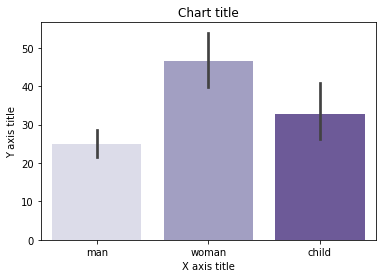

In [29]:
#Reading the dataset
#titanic_dataset = sns.load_dataset('titanic')

#Creating column chart
sns.barplot(x = 'who',y = 'fare',data = df,palette = "Purples")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

# Show the plot
plt.show()

**Grouped bar chart**

**A grouped bar chart is used when we want to compare the values in certain groups and sub-groups**

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

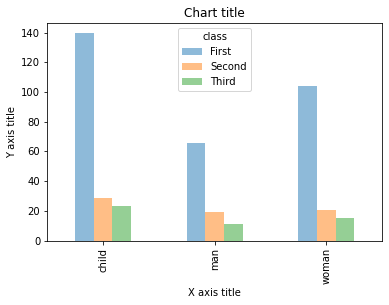

In [30]:
#Grouped bar chart using Matplotlib
#Creating the dataset
#df = sns.load_dataset('titanic')

df_pivot = pd.pivot_table(df, values="fare",index="who",columns="class", aggfunc=np.mean)

#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Grouped bar chart using Seaborn

<AxesSubplot:xlabel='who', ylabel='fare'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

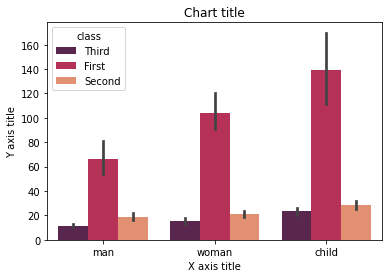

In [36]:
#Reading the dataset
#titanic_dataset = sns.load_dataset('titanic')

#Creating the bar plot grouped across classes
sns.barplot(x = 'who',y = 'fare',hue = 'class',data = df, palette = "rocket")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### Stacked bar chart

### A stacked bar chart is used when we want to compare the total sizes across the available groups and the composition of the different sub-groups


<AxesSubplot:xlabel='A'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

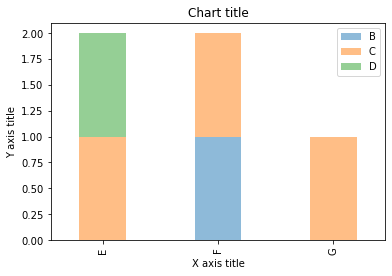

In [40]:
#Stacked bar chart using Matplotlib

# Stacked bar chart 
#Creating the dataset
df = pd.DataFrame(columns=["A","B", "C","D"], 
                  data=[["E",0,1,1],
                        ["F",1,1,0],
                        ["G",0,1,0]])

df.plot.bar(x='A', y=["B", "C","D"],  stacked=True,  width = 0.4,alpha=0.5) 

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')  

#Show the plot
plt.show()


<AxesSubplot:>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

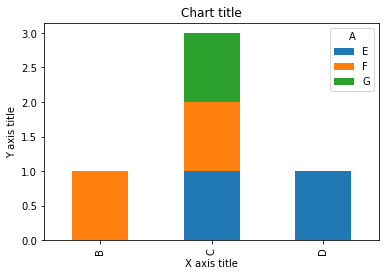

In [38]:
#stacked bar chart using Seaborn

dataframe = pd.DataFrame(columns=["A","B", "C","D"], 
                  data=[["E",0,1,1],
                        ["F",1,1,0],
                        ["G",0,1,0]])
dataframe.set_index('A').T.plot(kind='bar', stacked=True)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Line chart

### A line chart is used for the representation of continuous data points. This visual can be effectively utilized when we want to understand the trend across time.

### Line chart using Matplotlib

In [ ]:
#Creating the dataset
df = sns.load_dataset("iris") 
df=df.groupby('sepal_length')['sepal_width'].sum().to_frame().reset_index()

#Creating the line chart
plt.plot(df['sepal_length'], df['sepal_width'])

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()